In [10]:
from neural_network import *

from matplotlib import pyplot as plt

In [11]:
file_path = "../Data/01_Inicial_v8.xlsx"

D = Data_loader(file_path,seed=0)

In [12]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

NN.set_norms(D.X1_norm,D.X2_norm,D.Y1_norm,D.Y2_norm)

In [13]:
# Set hyperparameters
n_epochs1 = 300
batch_size1 = 80
n_epochs2 = 1000
batch_size2 = 80
n_epochs3 = 100
batch_size3 = 80

lr1 = 1e-3
lr2 = 1e-3
lr3 = 1e-3

scheduler_step1 = 100
scheduler_gamma1 = 0.9

scheduler_step2 = 100
scheduler_gamma2 = 0.9

scheduler_step3 = 100
scheduler_gamma3 = 0.75

layers1 = [8 for _ in range(2)]
layers2 = [16 for _ in range(4)]

dropout1 = 0.2
dropout2 = 0.2

In [14]:
# Pre-train the first network
NN.init_net1(layers=layers1, dropout=dropout1)

loss1_train_pre = []
loss1_val_pre = []

opt1 = torch.optim.Adam(NN.net1.parameters(),lr=lr1)
sch1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=scheduler_step1, gamma=scheduler_gamma1)

for epoch in range(n_epochs1):

  NN.net1.train()
  opt1.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  for X1, Y1_target in D.get_batch1(batch_size=batch_size1):
    Y1_pred = NN.net1(X1)
    loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')
    loss.backward()
    opt1.step()

    loss_train_epoch += loss.item()

  NN.net1.eval()
  with torch.no_grad():
    for X1, Y1_target in D.get_batch1(batch_size=batch_size1,validation=True):
      Y1_pred = NN.net1(X1)
      loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')

      loss_val_epoch += loss.item()

  loss_train_epoch = loss_train_epoch/(D.n_train*output_size1)
  loss_val_epoch = loss_val_epoch/(D.n_val*output_size1)

  loss1_train_pre.append(loss_train_epoch)
  loss1_val_pre.append(loss_val_epoch)

  sch1.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch}, Validation loss: {loss_val_epoch}')

Epoch: 0, Loss: 1.1545161483879376, Validation loss: 1.2986256613660214
Epoch: 10, Loss: 1.0377522160236101, Validation loss: 1.1853860883570428
Epoch: 20, Loss: 0.9545798337549195, Validation loss: 1.0987125225921175
Epoch: 30, Loss: 0.8423971878854852, Validation loss: 0.9806958098909748
Epoch: 40, Loss: 0.7137553709790223, Validation loss: 0.8181826463386194
Epoch: 50, Loss: 0.540604555517211, Validation loss: 0.64482287506559
Epoch: 60, Loss: 0.436695615151771, Validation loss: 0.5252609252929688
Epoch: 70, Loss: 0.35859224133025436, Validation loss: 0.455786804654705
Epoch: 80, Loss: 0.3449101842435679, Validation loss: 0.40651013957920357
Epoch: 90, Loss: 0.3173291647344604, Validation loss: 0.36078381894239736
Epoch: 100, Loss: 0.2754707659097542, Validation loss: 0.31553259892250174
Epoch: 110, Loss: 0.2762485016557507, Validation loss: 0.2734861800919718
Epoch: 120, Loss: 0.22343479601064123, Validation loss: 0.23081897621724143
Epoch: 130, Loss: 0.18891583349471702, Validatio

In [15]:
# Train the second network
NN.init_net2(layers=layers2, dropout=dropout2)

loss1_train = []
loss1_val = []
loss2_train = []
loss2_val = []
loss_train = []
loss_val = []

opt2 = torch.optim.Adam(NN.net2.parameters(),lr=lr2)
sch2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=scheduler_step2, gamma=scheduler_gamma2)

for epoch in range(n_epochs2):
  NN.train()
  opt2.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size2):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt2.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size2,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch2.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.5507962071618369 (0.0826140470282976 + 1.018978367295376), Validation loss: 0.666075035377785 (0.04513624862388328 + 1.2870138662832755)
Epoch: 10, Loss: 0.5319930497990099 (0.09525474725767624 + 0.9687313700831214), Validation loss: 0.6560346108895762 (0.04513624862388328 + 1.2669330173068576)
Epoch: 20, Loss: 0.4370364876680596 (0.08874451836874318 + 0.7853284791458485), Validation loss: 0.5690577824910482 (0.04513624862388328 + 1.09297928986726)
Epoch: 30, Loss: 0.34079775255779887 (0.09790333259937375 + 0.5836921691894531), Validation loss: 0.4121815363566081 (0.04513624862388328 + 0.7792267975983797)
Epoch: 40, Loss: 0.24146866022154342 (0.08810395307319109 + 0.3948333740234375), Validation loss: 0.28898127873738605 (0.04513624420872441 + 0.5328263176812066)
Epoch: 50, Loss: 0.2099700927734375 (0.09323592075081759 + 0.3267042736674464), Validation loss: 0.18882615477950485 (0.04513624420872441 + 0.3325160697654442)
Epoch: 60, Loss: 0.18608584293099337 (0.11602413

In [16]:
# Fine-tune both networks
opt3 = torch.optim.Adam(NN.parameters(),lr=lr3)
sch3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=scheduler_step3, gamma=scheduler_gamma3)

for epoch in range(n_epochs3):
  NN.train()
  opt3.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size3):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt3.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size3,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch3.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.08374774844147438 (0.0992818366649539 + 0.06821366021799487), Validation loss: 0.059667989059730815 (0.04500866819311072 + 0.0743273099263509)


Epoch: 10, Loss: 0.0829224608665289 (0.08242439669232036 + 0.08342052504073742), Validation loss: 0.05776076846652561 (0.03924661212497287 + 0.07627492480807835)
Epoch: 20, Loss: 0.06608700641365939 (0.05724080163379048 + 0.07493320620337197), Validation loss: 0.059379643864101835 (0.03625651642128273 + 0.08250277130692094)
Epoch: 30, Loss: 0.08318183810211892 (0.10590172701103742 + 0.060461946975353155), Validation loss: 0.05617045914685285 (0.03475239321037575 + 0.0775885228757505)
Epoch: 40, Loss: 0.08449337981468023 (0.09295255527939908 + 0.07603420434996139), Validation loss: 0.06507651452664975 (0.03468192948235406 + 0.09547109957094546)
Epoch: 50, Loss: 0.05781167496082395 (0.0563668594803921 + 0.05925649376802666), Validation loss: 0.05606180208700674 (0.03216295551370691 + 0.07996064645272714)
Epoch: 60, Loss: 0.08404809153357218 (0.0860864240069722 + 0.08200976349586664), Validation loss: 0.0541137765955042 (0.031396596520035354 + 0.07683096108613191)
Epoch: 70, Loss: 0.05999

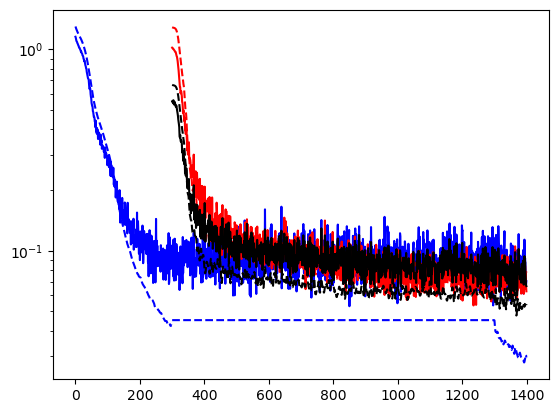

In [17]:
plt.figure()

epochs1 = range(len(loss1_train_pre))
epochs2 = range(len(loss1_train_pre),len(loss1_train_pre)+len(loss_train))

plt.plot(epochs1,loss1_train_pre,'b')
plt.plot(epochs1,loss1_val_pre,'b--')

plt.plot(epochs2,loss1_train,'b')
plt.plot(epochs2,loss1_val,'b--')

plt.plot(epochs2,loss2_train,'r')
plt.plot(epochs2,loss2_val,'r--')

plt.plot(epochs2,loss_train,'k')
plt.plot(epochs2,loss_val,'k--')

plt.yscale('log') 


In [18]:
NN.save('model.pt')